# 1. Define The Problems :
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

what sorts of people were more likely to survive ?


# 2. Data Collection
titanic.csv


### Load Library dan Dataset

In [5]:
#Install library
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

# Importing necessary libraries
import pandas as pd #data manipulation = merge, grouping, read data
import matplotlib.pyplot as plt # data viz
import seaborn as sns #data viz

# Setting the style for seaborn
sns.set(style="whitegrid")

In [6]:
# Loading the dataset
titanic_data = pd.read_csv('/content/titanic.csv',sep=',')

# Displaying the first few rows of the dataset
titanic_data.head() # cek isi data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. EDA  

In [ ]:
# Summary statistics of the dataset awal
titanic_data.describe() #summary statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Checking for missing values
titanic_data.isnull().sum() # cek total missing value

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Handling missing values in 'Age' by filling with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Handling missing values in 'Embarked' by filling with the mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Handling missing values in 'Fare' by filling with the median fare
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

# Dropping the 'Cabin' column due to a high number of missing values
titanic_data.drop(columns=['Cabin'], inplace=True)


<ipython-input-18-46b54f829dd3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
<ipython-input-18-46b54f829dd3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
# Checking for missing values again
missing_values_after = titanic_data.isnull().sum()
print("\nMissing values in the dataset after handling:")
print(missing_values_after)


Missing values in the dataset after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
# Checking for duplicates
duplicates = titanic_data.duplicated().sum()
print("\nNumber of duplicates in the dataset:")
print(duplicates)



Number of duplicates in the dataset:
0


In [ ]:
# Dropping duplicates
titanic_data.drop_duplicates(inplace=True)


In [ ]:
# Checking for duplicates again
duplicates_after = titanic_data.duplicated().sum()
print("\nNumber of duplicates in the dataset after removing duplicates:")
print(duplicates_after)


Number of duplicates in the dataset after removing duplicates:
0


In [ ]:
# Displaying the first few rows of the dataset
print("\nFirst few rows of the dataset after handling missing values and duplicates:")
print(titanic_data.head())




First few rows of the dataset after handling missing values and duplicates:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.

In [ ]:

# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(titanic_data.describe())



Summary statistics of the dataset:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# Information about the dataset
print("\nInformation about the dataset:")
print(titanic_data.info())



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


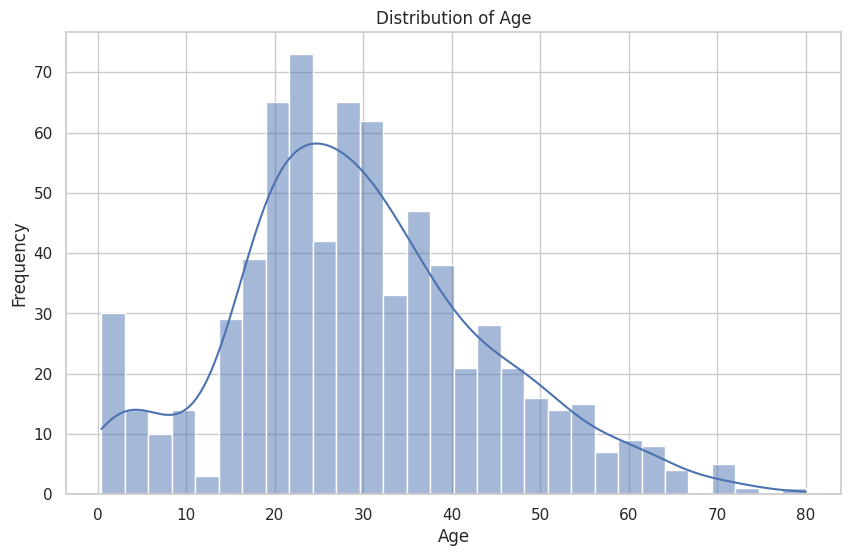

In [ ]:
# Visualizing the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



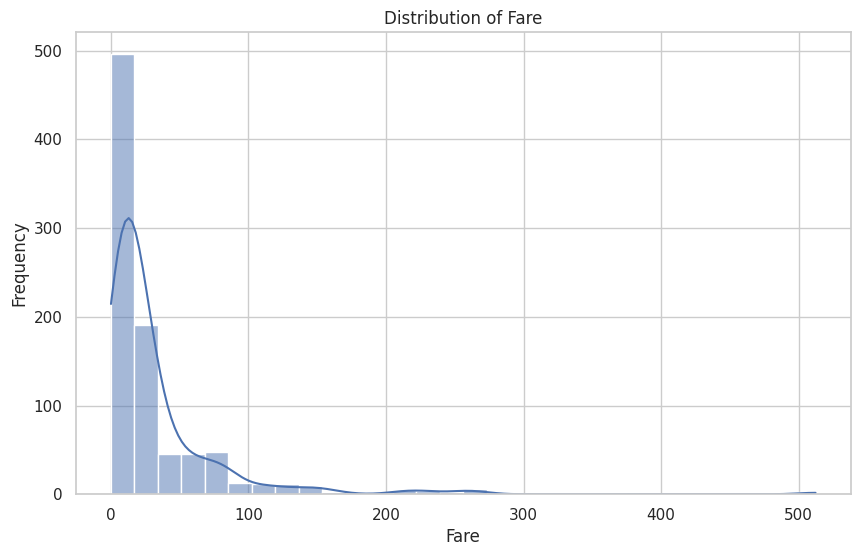

In [ ]:
# Visualizing the distribution of Fare
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()



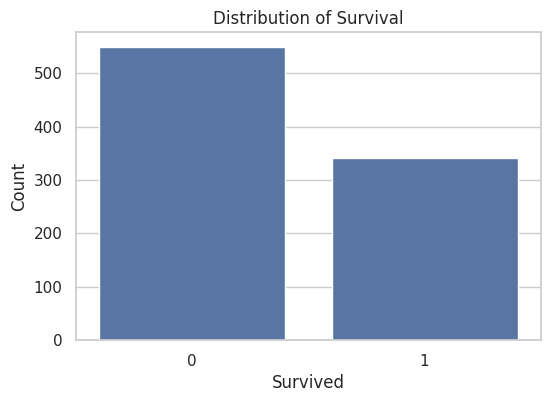

In [ ]:
# Visualizing the distribution of Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

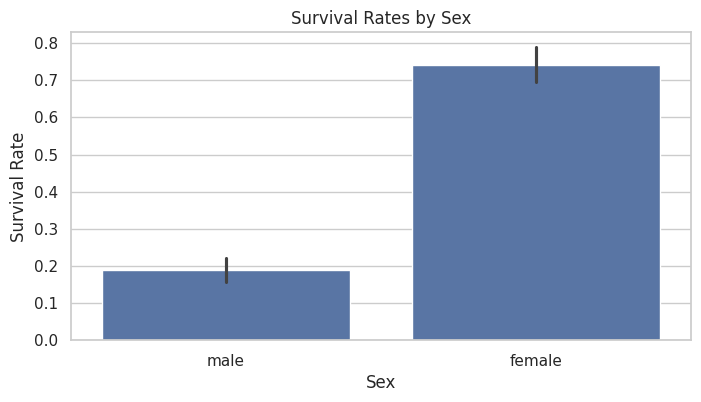

In [ ]:
# Survival rates based on Sex
plt.figure(figsize=(8, 4))
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rates by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()



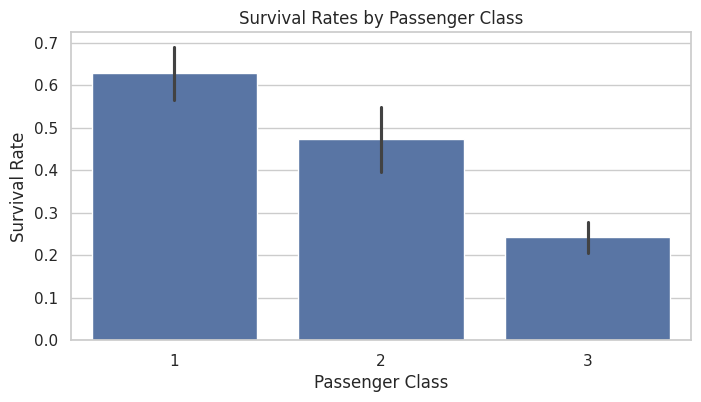

In [ ]:
# Survival rates based on Pclass
plt.figure(figsize=(8, 4))
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()



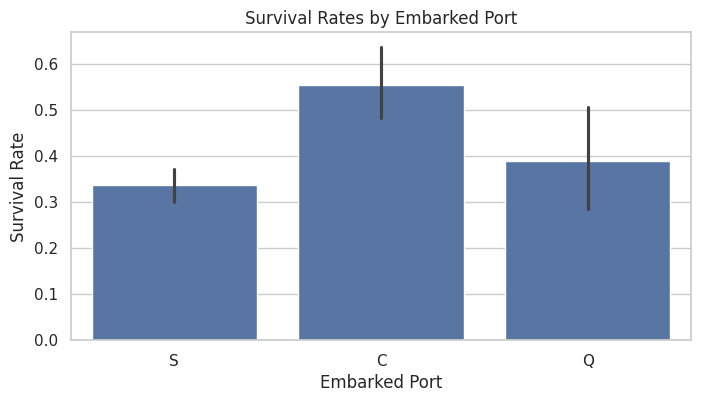

In [ ]:
# Survival rates based on Embarked
plt.figure(figsize=(8, 4))
sns.barplot(x='Embarked', y='Survived', data=titanic_data)
plt.title('Survival Rates by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

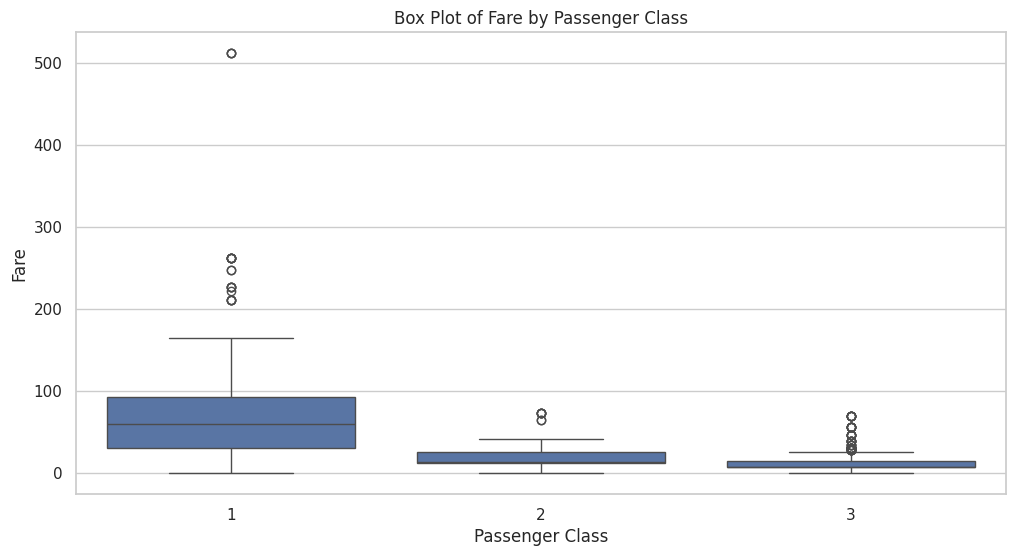

In [ ]:
# Box Plot for Numerical Features
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_data)
plt.title('Box Plot of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

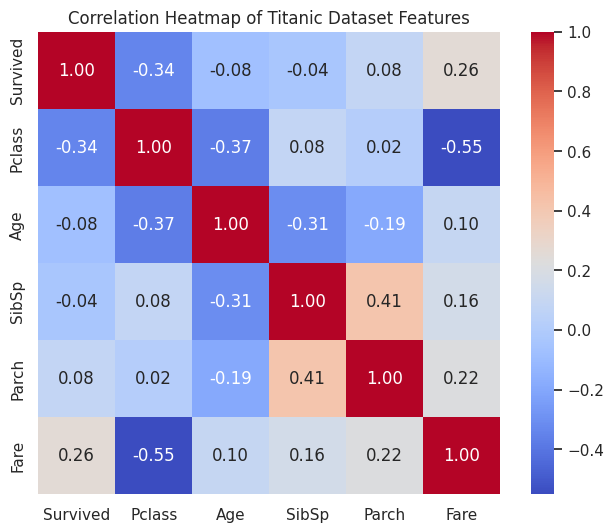

In [ ]:
# Correlation Plot (Heatmap)
# Selecting numerical features for correlation analysis
numerical_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = titanic_data[numerical_features].corr()

# Generating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Titanic Dataset Features')
plt.show()